### 1. Sourcing and Loading 

**Problem:** Which boroughs of London have seen the greatest increase in housing prices, on average, from 1995 January to 2021 September?

#### 1.1. Importing Libraries

In [2]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np
# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [3]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [4]:
#Exploring data
properties

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2021-05-01,720954.3631,312430.6526,533319.3495,361919.1777,506917.3065,464872.5485,811080.3625,391236.9134,508368.5016,...,185423.3235,182339.4077,213819.6823,217328.3043,310491.7583,487722.6137,344759.8103,278603.3754,NaN,268724.3741
318,2021-06-01,729878.6878,317234.7354,541296.7827,364464.1865,514055.8987,470431.4171,814571.2461,393198.4071,507915.9556,...,197661.6803,193209.6025,223976.9936,229297.292,322092.8865,504433.0067,358976.2837,295365.2541,NaN,282278.1418
319,2021-07-01,-,319549.9296,536012.6687,366451.6388,528684.0547,466447.004,906099.2001,389730.0859,515141.3288,...,183579.6782,181001.6873,213574.8626,219099.9661,311122.1376,499917.0498,347159.291,275176.6978,NaN,269084.097
320,2021-08-01,-,322496.3752,544558.8072,373547.2951,533696.3904,473570.3561,921525.014,393245.7812,515422.2833,...,193412.2798,184981.5805,220414.7332,224543.8573,322439.0604,522364.6891,360169.2272,289645.0637,NaN,279653.1009


In [5]:
properties.index

RangeIndex(start=0, stop=322, step=1)

In [6]:
properties.shape

(322, 49)

**2.2. Cleaning the data**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [7]:
#drop first row. I dont need ids. The name of boroughs makes the same job.
properties = properties.drop(index=0, axis=1)

In [8]:
properties

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548
5,1995-05-01,84409.14932,53042.24852,90258.00033,63997.13588,73704.04743,81542.61561,119929.2782,68844.9169,82077.05525,...,44223.61973,44830.98563,45878.00396,50369.66188,56479.80183,75432.02786,64530.36358,54698.83831,NaN,53678.24041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2021-05-01,720954.3631,312430.6526,533319.3495,361919.1777,506917.3065,464872.5485,811080.3625,391236.9134,508368.5016,...,185423.3235,182339.4077,213819.6823,217328.3043,310491.7583,487722.6137,344759.8103,278603.3754,NaN,268724.3741
318,2021-06-01,729878.6878,317234.7354,541296.7827,364464.1865,514055.8987,470431.4171,814571.2461,393198.4071,507915.9556,...,197661.6803,193209.6025,223976.9936,229297.292,322092.8865,504433.0067,358976.2837,295365.2541,NaN,282278.1418
319,2021-07-01,-,319549.9296,536012.6687,366451.6388,528684.0547,466447.004,906099.2001,389730.0859,515141.3288,...,183579.6782,181001.6873,213574.8626,219099.9661,311122.1376,499917.0498,347159.291,275176.6978,NaN,269084.097
320,2021-08-01,-,322496.3752,544558.8072,373547.2951,533696.3904,473570.3561,921525.014,393245.7812,515422.2833,...,193412.2798,184981.5805,220414.7332,224543.8573,322439.0604,522364.6891,360169.2272,289645.0637,NaN,279653.1009


In [9]:
# Drop the columns which are not boroughs
properties = properties.drop(columns=['City of London'])


In [10]:
# Make a list of columns which are not boroughs of London.
non_broughs = properties.columns[33:]

In [11]:
#drop non-borough columns
properties = properties.drop(columns=non_broughs)

In [12]:
properties.shape

(321, 33)

In [13]:
# Check the index of date column
properties.columns[0]

'Unnamed: 0'

In [14]:
#rename date column
properties = properties.rename(columns={properties.columns[0]: 'date'})

In [15]:
#find the list of boroughs
a = properties.columns[1:33].values

**2.3.Transforming the data**

Remember what Wes McKinney said about tidy data? 

In [16]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 1 to 321
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  321 non-null    datetime64[ns]
 1   Barking & Dagenham    321 non-null    object        
 2   Barnet                321 non-null    object        
 3   Bexley                321 non-null    object        
 4   Brent                 321 non-null    object        
 5   Bromley               321 non-null    object        
 6   Camden                321 non-null    object        
 7   Croydon               321 non-null    object        
 8   Ealing                321 non-null    object        
 9   Enfield               321 non-null    object        
 10  Greenwich             321 non-null    object        
 11  Hackney               321 non-null    object        
 12  Hammersmith & Fulham  321 non-null    object        
 13  Haringey            

In [17]:
# create a year and month column
properties['year']=properties['date'].dt.year

In [18]:
properties

,date,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,year
1,1995-01-01,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,72514.69096,...,53539.31919,72189.58437,109326.1245,67885.20344,71536.97357,59865.18995,61319.44913,88559.04381,133025.2772,1995
2,1995-02-01,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,73155.19746,...,53153.88306,72141.6261,111103.0394,64799.0648,70893.20851,62318.53353,60252.12246,88641.01678,131468.3096,1995
3,1995-03-01,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,72190.44144,...,53458.26393,72501.35502,107325.4742,65763.29719,70306.83844,63938.67686,60871.08493,87124.81523,132260.3417,1995
4,1995-04-01,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,71442.92235,...,54479.75395,72228.60295,106875,63073.62117,69411.9439,66233.19383,60971.39722,87026.00225,133370.2036,1995
5,1995-05-01,53042.24852,90258.00033,63997.13588,73704.04743,81542.61561,119929.2782,68844.9169,82077.05525,70630.77955,...,55803.95958,72366.64122,107707.6799,64420.49933,69759.21989,66432.85846,61494.16938,86518.05945,133911.1117,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2021-05-01,312430.6526,533319.3495,361919.1777,506917.3065,464872.5485,811080.3625,391236.9134,508368.5016,418235.5793,...,380125.6198,451935.9512,701319.953,507543.0745,395317.852,438160.3873,476898.2854,600170.4199,908209.3205,2021
318,2021-06-01,317234.7354,541296.7827,364464.1865,514055.8987,470431.4171,814571.2461,393198.4071,507915.9556,419803.0944,...,382971.0109,455605.5482,698800.8957,507753.747,396832.6977,441463.0108,474203.8201,602200.0282,888342.854,2021
319,2021-07-01,319549.9296,536012.6687,366451.6388,528684.0547,466447.004,906099.2001,389730.0859,515141.3288,421158.7954,...,366701.6688,461489.5978,719159.0459,519188.4685,401044.1434,459966.7264,493007.7479,602540.2419,922331.0222,2021
320,2021-08-01,322496.3752,544558.8072,373547.2951,533696.3904,473570.3561,921525.014,393245.7812,515422.2833,433986.2088,...,379482.6897,470113.1844,736113.0276,534447.2837,401378.723,466570.5264,502104.8103,614932.2951,1016725.048,2021


In [19]:
# DataFrame for average housing price by broughs
properties_by_year = properties.groupby('year')[a].mean().round()

In [20]:
properties_by_year.isnull().sum()
#there is no null values

Barking & Dagenham      0
Barnet                  0
Bexley                  0
Brent                   0
Bromley                 0
Camden                  0
Croydon                 0
Ealing                  0
Enfield                 0
Greenwich               0
Hackney                 0
Hammersmith & Fulham    0
Haringey                0
Harrow                  0
Havering                0
Hillingdon              0
Hounslow                0
Islington               0
Kensington & Chelsea    0
Kingston upon Thames    0
Lambeth                 0
Lewisham                0
Merton                  0
Newham                  0
Redbridge               0
Richmond upon Thames    0
Southwark               0
Sutton                  0
Tower Hamlets           0
Waltham Forest          0
Wandsworth              0
Westminster             0
dtype: int64

In [32]:
properties_by_year

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
1995,51818.0,91793.0,64292.0,73030.0,81967.0,120367.0,68923.0,81219.0,71984.0,63390.0,...,80501.0,54574.0,72580.0,109892.0,64260.0,70291.0,63652.0,61280.0,88829.0,133689.0
1996,51718.0,94000.0,65490.0,75236.0,83547.0,133810.0,69714.0,83390.0,74062.0,65187.0,...,83999.0,55747.0,75359.0,117308.0,70117.0,71652.0,70095.0,62177.0,92270.0,139189.0
1997,55974.0,106883.0,70789.0,86749.0,94225.0,150143.0,77674.0,97806.0,83609.0,72068.0,...,95699.0,60971.0,83372.0,136656.0,79726.0,81094.0,85760.0,68229.0,108108.0,165448.0
1998,60286.0,122359.0,80632.0,100693.0,108287.0,170689.0,88143.0,111343.0,93030.0,81533.0,...,108050.0,67671.0,94514.0,162956.0,91405.0,92087.0,96505.0,75557.0,125407.0,190532.0
1999,65321.0,136005.0,86778.0,112157.0,120874.0,191091.0,97173.0,126278.0,101987.0,90879.0,...,121901.0,74526.0,102940.0,181772.0,110268.0,100870.0,113035.0,83822.0,145340.0,214043.0
2000,77550.0,167953.0,103187.0,140963.0,147827.0,247115.0,118777.0,153309.0,121839.0,110163.0,...,151605.0,92887.0,124379.0,227866.0,142267.0,125952.0,141288.0,103031.0,184276.0,260492.0
2001,88664.0,185563.0,116527.0,157287.0,162132.0,278594.0,132509.0,170191.0,135713.0,125820.0,...,167046.0,108763.0,141588.0,241333.0,164486.0,137910.0,162506.0,118843.0,205180.0,296105.0
2002,112222.0,220746.0,136798.0,185898.0,186646.0,314180.0,157023.0,198427.0,159791.0,147422.0,...,195715.0,137456.0,169368.0,271689.0,184684.0,162527.0,187289.0,148137.0,232806.0,339622.0
2003,142499.0,251213.0,164482.0,216502.0,215993.0,323054.0,185784.0,221689.0,190573.0,171043.0,...,220394.0,168438.0,203572.0,294168.0,199584.0,187816.0,207902.0,175076.0,253342.0,363466.0


**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

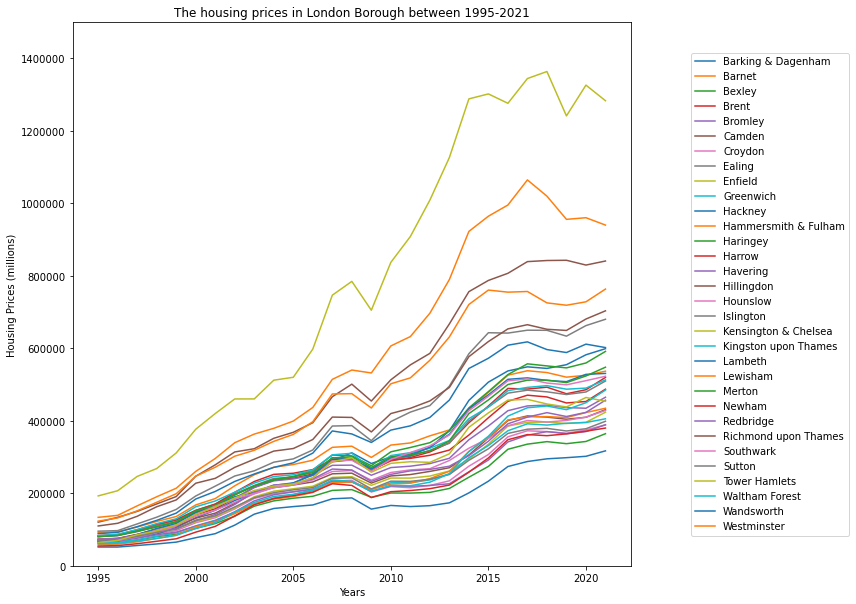

In [29]:
properties_by_year.plot(figsize=(10, 10))
plt.title('The housing prices in London Borough between 1995-2021')
plt.xlabel('Years')
plt.ylabel('Housing Prices (millions)')
plt.ylim(0, 2021)
plt.ylim(0, 1500000) 
plt.legend(bbox_to_anchor=(1.4, 0.5), loc='center right')
plt.ticklabel_format(style = 'plain', axis='y')
plt.show()

In [34]:
# Average prices for a year
properties_by_year.loc['mean'] = properties_by_year.mean()
# Average incerease for a year
properties_by_year.loc['average increase'] = (properties_by_year.loc[2021]-properties_by_year.loc[1995])/27
# The percentage of increase from 1995 to 2021.
properties_by_year.loc['ratio'] =((properties_by_year.loc[2021]-properties_by_year.loc[1995])*100)/properties_by_year.loc[1995]

In [35]:
properties_by_year = properties_by_year.round()

In [36]:
properties_by_year.idxmax(axis = 1)

year
1995                Kensington & Chelsea
1996                Kensington & Chelsea
1997                Kensington & Chelsea
1998                Kensington & Chelsea
1999                Kensington & Chelsea
2000                Kensington & Chelsea
2001                Kensington & Chelsea
2002                Kensington & Chelsea
2003                Kensington & Chelsea
2004                Kensington & Chelsea
2005                Kensington & Chelsea
2006                Kensington & Chelsea
2007                Kensington & Chelsea
2008                Kensington & Chelsea
2009                Kensington & Chelsea
2010                Kensington & Chelsea
2011                Kensington & Chelsea
2012                Kensington & Chelsea
2013                Kensington & Chelsea
2014                Kensington & Chelsea
2015                Kensington & Chelsea
2016                Kensington & Chelsea
2017                Kensington & Chelsea
2018                Kensington & Chelsea
2019       

In [37]:
properties_by_year.max(axis = 1)

year
1995                 192857.0
1996                 207157.0
1997                 246656.0
1998                 268350.0
1999                 311455.0
2000                 376802.0
2001                 420129.0
2002                 460382.0
2003                 460491.0
2004                 512187.0
2005                 520206.0
2006                 598008.0
2007                 746679.0
2008                 784835.0
2009                 705188.0
2010                 837315.0
2011                 908565.0
2012                1009045.0
2013                1126573.0
2014                1288406.0
2015                1302103.0
2016                1276235.0
2017                1344540.0
2018                1363880.0
2019                1241423.0
2020                1326363.0
2021                1283384.0
mean                 782193.0
average increase      40390.0
ratio                   807.0
dtype: float64

In [38]:
# create a new df for last three rows.
properties_final = properties_by_year.tail(3).transpose().sort_values('ratio', ascending=False).head(15)
properties_final

year,mean,average increase,ratio
Hackney,307255.0,19745.0,807.0
Southwark,292228.0,16989.0,714.0
Waltham Forest,237989.0,15693.0,691.0
Lambeth,297163.0,17137.0,679.0
Haringey,312930.0,18945.0,639.0
Lewisham,231688.0,13920.0,638.0
Tower Hamlets,272166.0,14460.0,613.0
Islington,386880.0,21657.0,612.0
Brent,287113.0,16550.0,612.0
Westminster,572421.0,29869.0,603.0


### 4. Conclusion
There is an increase in housing prices in all boroughs of London from 1995 to 2021 (See the figure). While Kensington & Chelsea is the most expensive borough of London over the last 26 years as Hackney has the largest percentage (807%) of increase from 1995 to 2021.